In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import xlrd                            #Converts dates to a readable format
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  #adds legend to plots

In [2]:
my_data = pd.read_csv("/home/arnold/Desktop/Data_Glacier/Week2/Week_2/Cab_Data_Master.csv")

In [3]:
#Understanding the data

In [4]:
my_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Monthly_Income_USD
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [5]:
my_data.tail()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Monthly_Income_USD
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card,Male,20,11284


In [6]:
my_data.shape

(359392, 12)

In [7]:
my_data.describe()

,Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Monthly_Income_USD
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [8]:
my_data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Monthly_Income_USD'],
      dtype='object')

In [9]:
my_data.nunique()           #check for total number of unique values in each collumn

Transaction_ID        359392
Date_of_Travel          1095
Company                    2
City                      19
KM_Travelled             874
Price_Charged          99176
Cost_of_Trip           16291
Customer_ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Monthly_Income_USD     22725
dtype: int64

In [10]:
#Cleaning the data

In [11]:
my_data.isnull().sum()        #Check for null values in the data

Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Monthly_Income_USD    0
dtype: int64

In [12]:
# Relationship analysis

#==Calculate profit
my_data["Profit"] = my_data["Price_Charged"] - my_data["Cost_of_Trip"]  
#Total Profit Per Company
Total_Profit_per_Company = my_data.groupby('Company')['Profit'].agg(['sum', 'mean']).reset_index() #sum all profit values per company to find topmost y position for the bars (100%)
Total_Profit_per_Company.head()
#Total Rides Per Company
Total_Rides_per_Company = my_data.groupby('Company')['Transaction_ID'].count().reset_index() #sum all rides per company to find topmost y position for the bars (100%)
Total_Rides_per_Company.head()

#================== CONCLUSION  ============================
#Pink cab
#Total_profit = 5307328
#Total_rides = 84711
#Profit_per_ride = 62.65

#Yellow Cab
#Total_profit = 44020370 
#Total_rides = 274681  
#Profit_per_ride = 160.26 

#Yellow cab generates more profit in general and per ride 

,Company,Transaction_ID
0,Pink Cab,84711
1,Yellow Cab,274681


Text(0.5, 0, 'Date of Travel')

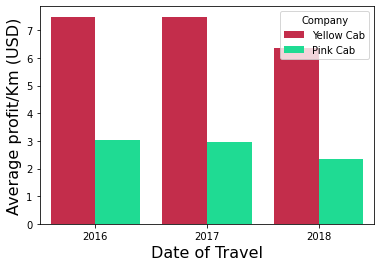

In [13]:
#=== Average profit per KM (for each cab in each year)  

#Calculate profit per KM
my_data["Profit_per_KM"] = my_data["Profit"]/my_data["KM_Travelled"] 

#==sort dates and change their format
my_data = my_data.sort_values(by=['Date_of_Travel'], ascending=True)     #Sort dates column
my_data['Date_of_Travel'] = my_data['Date_of_Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0)) #change format 

#==Plotting relationships
AvProfit = sns.barplot(x = my_data["Date_of_Travel"].dt.year,
                       y= "Profit_per_KM", 
                       hue="Company", 
                       ci=None, 
                       palette=["crimson", "mediumspringgreen"],
                       data=my_data)

AvProfit.set_ylabel("Average profit/Km (USD)", fontsize = 16)
AvProfit.set_xlabel("Date of Travel", fontsize = 16)
#================== CONCLUSION  ============================
# Yellow Cab generates higher profit on average per annum

Text(0.5, 0, 'Date of Travel')

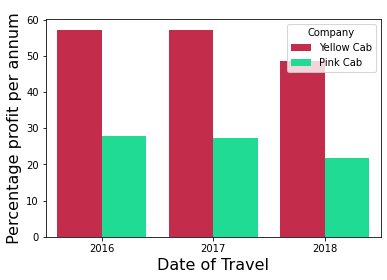

In [14]:
#=== Percentage profit per annum (for each cab in each year) 
my_data["Perc_Profit"] = (my_data["Profit"] / my_data["Cost_of_Trip"])*100  #Calculate % Profit

#Plotting
PercProfit = sns.barplot(x = my_data["Date_of_Travel"].dt.year, 
                         y= "Perc_Profit", 
                         hue="Company",
                         data=my_data, 
                         palette=["crimson", "mediumspringgreen"],
                         ci=None)
PercProfit.set_ylabel(" Percentage profit per annum ", fontsize = 16)
PercProfit.set_xlabel("Date of Travel", fontsize = 16)

#================== CONCLUSION  ============================
# Yellow cab generates nearly twice more profit than pink Cab per year

Text(0.5, 0, 'City')

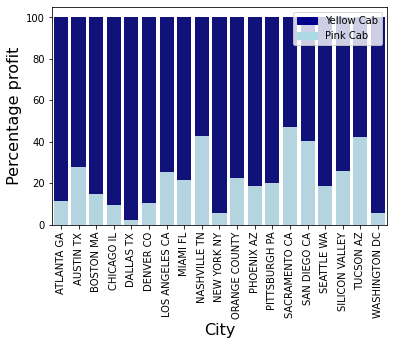

In [15]:
#=== Percentage profit for each cab in each city (Profitable ride citywise) 

# Convert from raw data to percentage
#== top bars -> 
Total_Profit_per_City = my_data.groupby('City')['Profit'].sum().reset_index() #sum all profit values per city to find highest y position of the bars (100%)

Pink_Cab = my_data[my_data.Company=='Pink Cab'].groupby('City')['Profit'].sum().reset_index() #get profit sum value for pink cab per city
Pink_Cab['Perc_Profit'] = [i / j * 100 for i,j in zip(Pink_Cab['Profit'], Total_Profit_per_City['Profit'])] #calculate pink cab percentage contribution from the total

Total_Profit_per_City['Perc_Profit'] = [i / j * 100 for i,j in zip(Total_Profit_per_City['Profit'], Total_Profit_per_City['Profit'])] #label values in the sum collumn as 100% to represent the highest percentage

# Plotting stacked bar plot
#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="City",  y="Perc_Profit", data=Total_Profit_per_City, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar2 = sns.barplot(x="City", y="Perc_Profit", data=Pink_Cab, color='lightblue')

bar2.tick_params(axis='x', rotation=90)  # Rotate x axis labels 

#== add legend
top_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, bottom_bar], loc='upper right')
#== add axes labels
bar2.set_ylabel(" Percentage profit ", fontsize = 16)
bar2.set_xlabel("City", fontsize = 16)

#================== CONCLUSION  ============================
# Overall Yellow Cab generates higher profits across all cities except SACRAMENTO CA

Text(0, 0.5, 'Average Profit')

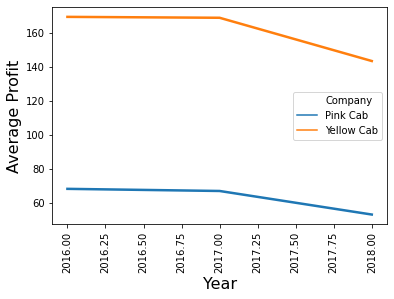

In [16]:
#=== Average Profit trend for each cab (across the years) 
Profit_Trend_per_Company_Per_Year = my_data.groupby([ 'Company', my_data["Date_of_Travel"].dt.year])['Profit'].agg(['sum', 'mean']).reset_index() 

Profit_Trend_per_Company_Per_Year=pd.DataFrame(Profit_Trend_per_Company_Per_Year)

# Plotting line plot
Profit_Trend_Plot = sns.lineplot(data=Profit_Trend_per_Company_Per_Year, 
                                 x=Profit_Trend_per_Company_Per_Year["Date_of_Travel"], 
                                 y=Profit_Trend_per_Company_Per_Year["mean"], 
                                 hue=Profit_Trend_per_Company_Per_Year["Company"],
                                 linewidth = 2.5)

Profit_Trend_Plot.tick_params(axis='x', rotation=90)  # Rotate x axis labels 
Profit_Trend_Plot.set_xlabel(xlabel="Year", fontsize = 16)
Profit_Trend_Plot.set_ylabel("Average Profit", fontsize = 16)

#================== CONCLUSION  ============================
# Profit steadily decreases from 2016 to 2017 and sharply drops in 2018 for each company

Text(0.5, 1.0, 'Yellow Cab')

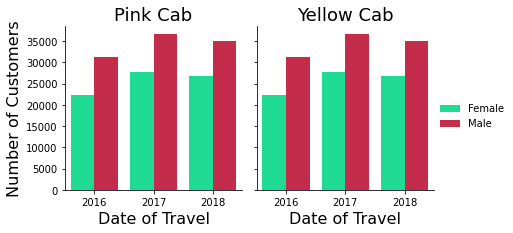

In [17]:
#=== Customer base gender-wise (for each cab in each year) 
Customer_base = my_data.groupby([ 'Gender', my_data["Date_of_Travel"].dt.year, 'Company'])['Gender'].agg(['count']).reset_index() 

# Plotting bar plots
Years = Customer_base.Date_of_Travel.unique()
grid = sns.FacetGrid(Customer_base, col="Company")
grid.map(sns.barplot, 
         x = Customer_base["Date_of_Travel"],
         y= Customer_base["count"],
         hue = Customer_base['Gender'],
         order=Years,
         palette=["mediumspringgreen", "crimson"],
         ci=None)

grid.add_legend()
#Set axes labels #Shape is [1,2] (one row, two columns).
grid.axes[0,0].set_ylabel('Number of Customers', fontsize = 16) #x axis labels 
grid.axes[0,0].set_xlabel('Date of Travel', fontsize = 16) #x axis labels 
grid.axes[0,1].set_xlabel('Date of Travel', fontsize = 16) #y axis label
grid.axes[0,0].set_title('Pink Cab', fontsize=18)
grid.axes[0,1].set_title('Yellow Cab', fontsize=18)

#plt.savefig('fig5.png',bbox_inches='tight', format='png', dpi=600)
                          
#================== CONCLUSION  ============================
#The numbers of male and female customers change each year, but remains nearly similar in both companies
#Generally more males than females use Yellow/Pink Cabs as their mode of transport 

Text(0.5, 1.0, 'Pink Cab')

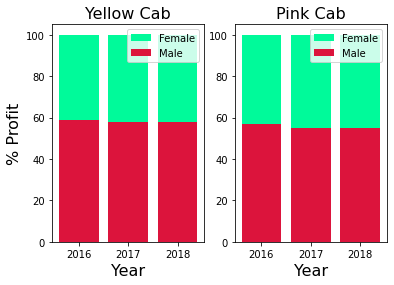

In [18]:
#=== Gender contribution to profit (for each cab in each year)

Total_Profit_Per_Year_Per_Company = my_data.groupby([ my_data["Date_of_Travel"].dt.year, 'Company'])['Profit'].sum().reset_index() 

#===
Pink_Cab = my_data[my_data.Company=='Pink Cab'].groupby([my_data["Date_of_Travel"].dt.year, 'Gender', my_data.Company=='Pink Cab'])['Profit'].sum().reset_index() #get sum profit for Males per Year per company

Males_Pink_Cab = Pink_Cab[Pink_Cab['Gender'].str.contains('Male')].reset_index(drop=True)
Total_Pink_Cab = Total_Profit_Per_Year_Per_Company[Total_Profit_Per_Year_Per_Company['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Males_Pink_Cab['Perc_Profit'] = [i / j * 100 for i,j in zip(Males_Pink_Cab['Profit'], Total_Pink_Cab["Profit"])] #calculate Males percentage contribution to Profit from the total

#===
Yellow_Cab = my_data[my_data.Company=='Yellow Cab'].groupby([my_data["Date_of_Travel"].dt.year, 'Gender', my_data.Company=='Yellow Cab'])['Profit'].sum().reset_index() #get sum profit values for Females per Year per company

Males_Yellow_Cab = Yellow_Cab[Yellow_Cab['Gender'].str.contains('Male')].reset_index(drop=True)
Total_Yellow_Cab = Total_Profit_Per_Year_Per_Company[Total_Profit_Per_Year_Per_Company['Company'].str.contains('Yellow Cab')].reset_index(drop=True)
Males_Yellow_Cab['Perc_Profit'] = [i / j * 100 for i,j in zip(Males_Yellow_Cab['Profit'], Total_Yellow_Cab['Profit'])] #calculate Males percentage contribution to Profit from the total

#===
Total_Pink_Cab['Perc_Profit'] = [i / j * 100 for i,j in zip(Total_Pink_Cab['Profit'], Total_Pink_Cab['Profit'])] #label the sum as 100% to represent the highest total percentage Profit
Total_Yellow_Cab['Perc_Profit'] = [i / j * 100 for i,j in zip(Total_Yellow_Cab['Profit'], Total_Yellow_Cab['Profit'])] #label the sum as 100% to represent the highest total percentage Profit

#=== Plotting stacked barplot using matplotlib
fig, axs = plt.subplots(1, 2)

# Yellow Cab
#Females
bar1 = axs[0].bar(x=Total_Yellow_Cab["Date_of_Travel"], 
                 height=Total_Yellow_Cab["Perc_Profit"], 
                 width=0.8, 
                 bottom=None,
                 align='center', 
                 color="mediumspringgreen",
                 data=Total_Yellow_Cab)

#Males
bar2 = axs[0].bar(x=Males_Yellow_Cab["Date_of_Travel"],
                  height=Males_Yellow_Cab["Perc_Profit"].astype(int),
                  width=0.8,
                  bottom=None,
                  align='center',
                  data=Males_Yellow_Cab,
                  color='crimson')

axs[0].legend(labels=['Female', 'Male'])  #Add legend
axs[0].set_xlabel("Year", fontsize=16)
axs[0].set_ylabel("% Profit", fontsize=16)
axs[0].set_title("Yellow Cab", fontsize=16)

# Pink Cab
#Females
bar3 = axs[1].bar(x=Total_Pink_Cab["Date_of_Travel"],
                  height=Total_Pink_Cab["Perc_Profit"].astype(int),
                  width=0.8,
                  bottom=None,
                  align='center',
                  data=Total_Pink_Cab,
                  color="mediumspringgreen")

#Males
bar4 = axs[1].bar(x=Males_Pink_Cab["Date_of_Travel"],
                  height=Males_Pink_Cab["Perc_Profit"].astype(int),
                  width=0.8,
                  bottom=None,
                  align='center',
                  data=Males_Pink_Cab,
                  color='crimson')

axs[1].legend(labels=['Female', 'Male'])  #Add legend
axs[1].set_xlabel("Year", fontsize=16)
axs[1].set_title("Pink Cab", fontsize=16)

#================== CONCLUSION  ============================
#Males largely contribute to profits in both companies (range 50-60%) than females (range 40-50%)

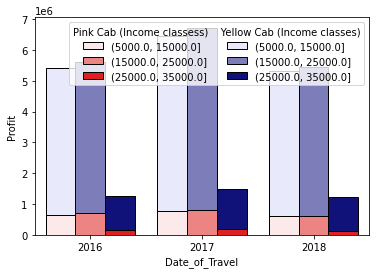

In [19]:
#=== Income class-wise profit analysis

#Lower class = <15000
#Middle class = 15000 - 25000
#Upper class = >25000

my_data.describe()

# assign the monthly income of each user an income class (e.g, range 15000 - 25000)
my_data['Income_Classes'] = my_data.groupby([my_data["Date_of_Travel"].dt.year, 'Company'])[['Monthly_Income_USD']].transform(lambda x: pd.cut(x, np.arange(5000, max(my_data["Monthly_Income_USD"])+10000, 10000)))

# Total profit accrued for each income class
Profit_Class = my_data.groupby([my_data["Date_of_Travel"].dt.year, 'Company', 'Income_Classes'])['Profit'].sum().reset_index() 

#Plot stacked bar graph: Will plot classes besides each other, for each year. Stacks will represent each company
c = ["red", "darkblue"]       #to distinguish the two companies
for i, g in enumerate(Profit_Class.groupby("Company")):
    ax = sns.barplot(data=g[1],
                     x="Date_of_Travel",
                     y="Profit",
                     hue="Income_Classes",
                     color=c[i],
                     zorder=-i, #plots bars in increasing order of class
                     edgecolor="k")
ax.grid(False)
ax.legend(ncol=2, title="Pink Cab (Income classess)    Yellow Cab (Income classes)")

#CONCLUSION
#Middle income earners (15000 - 25000) generate the largest profits for both Companies

#Reference: https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

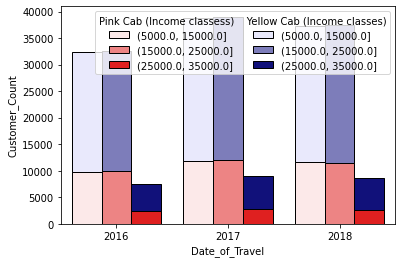

In [20]:
#=== Income class-wise customer-base analysis
#Using previous classes calculate the customer count per class

Customer_Class = my_data.groupby([my_data["Date_of_Travel"].dt.year, 'Company', 'Income_Classes'])['Profit'].agg(['count']).reset_index()
Customer_Class = Customer_Class.rename(columns={"count": "Customer_Count"})

# Plotting stacked bar plot
c = ["red", "darkblue"] #to match the two companies
for i, g in enumerate(Customer_Class.groupby("Company")):
    ax = sns.barplot(data=g[1],
                     x="Date_of_Travel",
                     y="Customer_Count",
                     hue="Income_Classes",
                     color=c[i],
                     zorder=-i, #plots bars in increasing order of class
                     edgecolor="k")
ax.grid(False)
ax.legend(ncol=2, title="Pink Cab (Income classess)    Yellow Cab (Income classes)")

#CONCLUSION
#Middle income earners (15000 - 25000) form the largest customer base for both Companies 

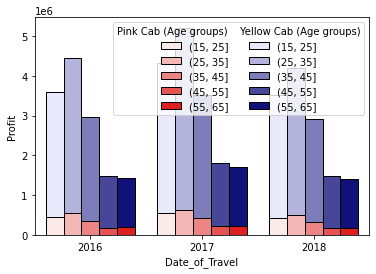

In [21]:
#=== Agegroup contribution to profit (Agegroup-wise profit analysis)

#Agegroups
# 18-25 : youth
# 26-35 : junior adults
# 36- 45 : adults
# 45-55 : senior adults
# 55+ : seniors

my_data.describe()

# Assign the age of each customer an agegroup
my_data['Age_Groups'] = my_data.groupby([my_data["Date_of_Travel"].dt.year, 'Company'])[['Age']].transform(lambda x: pd.cut(x, np.arange(15, max(my_data["Age"])+10, 10)))

# Total profit accumulated for each agegroup
AgeGroup_Profit = my_data.groupby([my_data["Date_of_Travel"].dt.year, 'Company', 'Age_Groups'])['Profit'].sum().reset_index() 

# Plot stacked bar graph: Will plot agegroups besides each other, for each year. Stacks will represent each company
c = ["red", "darkblue"] #to match the two companies
for i, g in enumerate(AgeGroup_Profit.groupby("Company")):
    ax = sns.barplot(data=g[1],
                     x="Date_of_Travel",
                     y="Profit",
                     hue="Age_Groups",
                     color=c[i],
                     zorder=-i, 
                     edgecolor="k")
ax.grid(False)
ax.legend(ncol=2, title="Pink Cab (Age groups)    Yellow Cab (Age groups)")

#CONCLUSION
#Junior adults (Age 25-35) contribute the largest amount to profits for both Companies 

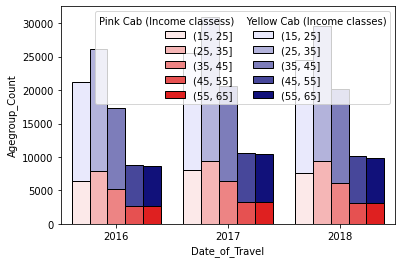

In [22]:
#=== Agegroup-wise customer-base analysis
#Using previous agegroups calculate the customer count per agegroup

Agegroup_Count = my_data.groupby([my_data["Date_of_Travel"].dt.year, 'Company', 'Age_Groups'])['Profit'].agg(['count']).reset_index()
Agegroup_Count = Agegroup_Count.rename(columns={"count": "Agegroup_Count"})


# Plot stacked bar plot
c = ["red", "darkblue"] 
for i, g in enumerate(Agegroup_Count.groupby("Company")):
    ax = sns.barplot(data=g[1],
                     x="Date_of_Travel",
                     y="Agegroup_Count",
                     hue="Age_Groups",
                     color=c[i],
                     zorder=-i, 
                     edgecolor="k")
ax.grid(False)
ax.legend(ncol=2, title="Pink Cab (Income classess)    Yellow Cab (Income classes)")

#CONCLUSION
#Likewise, Junior adults (Age 25-35) form the largest customer base for both Companies

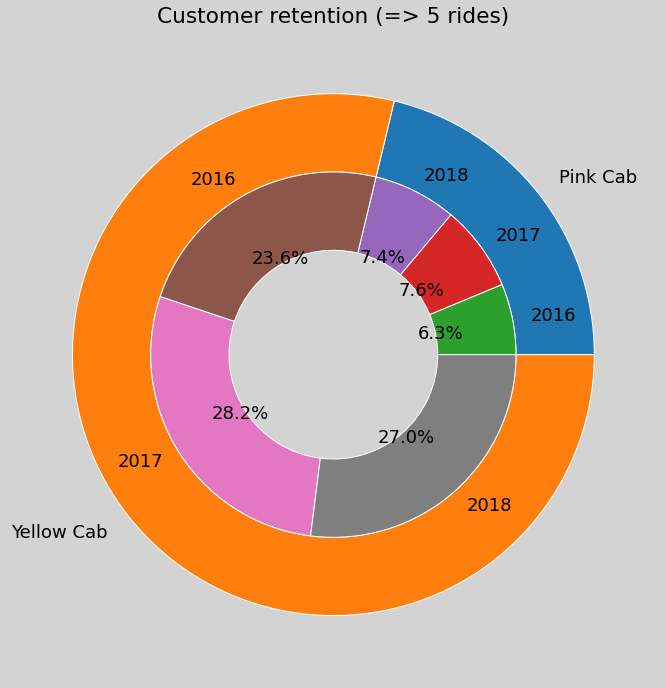

In [23]:
#=== Customer retention
# 5 or more rides

my_data.describe()

# Print all rows where the customer ID is duplicated more that 5 times
FiveOrMoreRides = pd.concat(g for _, g in my_data.groupby("Customer_ID") if len(g) >= 5)
FiveOrMoreRides = FiveOrMoreRides.groupby([FiveOrMoreRides["Date_of_Travel"].dt.year, 'Company'])['Customer_ID'].agg(['count']).reset_index() 

# Plotting Nested pie chart for five or More rides
outer = FiveOrMoreRides.groupby('Company')["count"].sum()  #numbers in the outer ring
outer_labels = outer.index #Extract labels
inner = FiveOrMoreRides.groupby(['Company','Date_of_Travel'])['count'].sum()  #numbers in the inner ring; group by both categorical variables
inner_labels = inner.index.get_level_values(1) #Extract labels

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3
plt.rcParams.update({'font.size': 18})

ax.pie(outer.values.flatten(), radius=1,
       labels=outer_labels,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Customer retention (=> 5 rides)')
fig.set_facecolor('lightgrey')

#CONCLUSION
# Yellow Cab is able to retain more customers compared to the Pink Cab

#Reference 
# Counting repeated data: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
# Nested pie chart: https://stackoverflow.com/questions/67210640/how-can-i-draw-a-nested-pie-graph-in-matplotlib-in-python

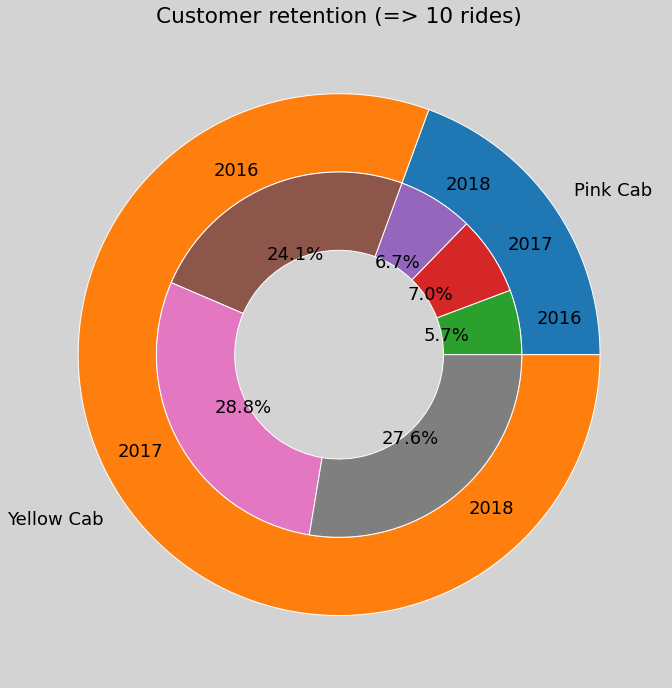

In [24]:
#=== Customer retention
# 10 or more rides

TenOrMoreRides = pd.concat(g for _, g in my_data.groupby("Customer_ID") if len(g) >= 10)
TenOrMoreRides = TenOrMoreRides.groupby([TenOrMoreRides["Date_of_Travel"].dt.year, 'Company'])['Customer_ID'].agg(['count']).reset_index() 

#Plotting nested pie chart for ten or more rides
outer = TenOrMoreRides.groupby('Company')["count"].sum()  #numbers in the outer ring
outer_labels = outer.index     #Extract labels
inner = TenOrMoreRides.groupby(['Company','Date_of_Travel'])['count'].sum()   #numbers in the inner ring; group by both categorical variables
inner_labels = inner.index.get_level_values(1)   #Extract labels

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3
plt.rcParams.update({'font.size': 18})

ax.pie(outer.values.flatten(), radius=1,
       labels=outer_labels,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Customer retention (=> 10 rides)')
fig.set_facecolor('lightgrey')

#CONCLUSION
# Yellow Cab has a better customer retention rate than Pink Cab

Text(0.5, 0, 'City')

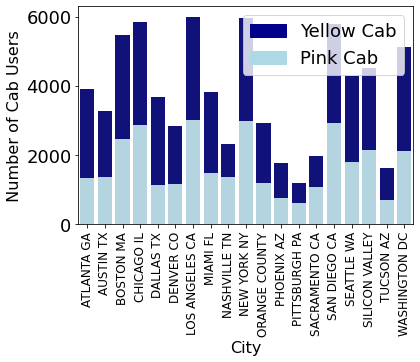

In [25]:
#=== City-Wise Cab users covered by each company

Per_City_Users = my_data.groupby(['Company','City'])["Customer_ID"].nunique().reset_index() #Calculate total number of unique Customer_IDs

Pink_Cab = Per_City_Users[Per_City_Users['Company'].str.contains('Pink Cab')].reset_index(drop=True)

Yellow_Cab = Per_City_Users[Per_City_Users['Company'].str.contains('Yellow Cab')].reset_index(drop=True)
Yellow_Cab['Customer_ID'] = Yellow_Cab['Customer_ID']+Pink_Cab['Customer_ID'] #Stacking Yellow Cab over Pink Cab 

# Plotting stacked bar graph
#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="City",  y="Customer_ID", data=Yellow_Cab, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar2 = sns.barplot(x="City", y="Customer_ID", data=Pink_Cab, color='lightblue')

bar2.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 
#== add legend
top_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, bottom_bar], loc='upper right')
#== add axes labels
bar2.set_ylabel(" Number of Cab Users ", fontsize = 16)
bar2.set_xlabel("City", fontsize = 16)

#CONCLUSION
# Yellow Cabs cover a larger number of cab Users compared to Pink Cabs across most cities

Text(0.5, 0, 'City')

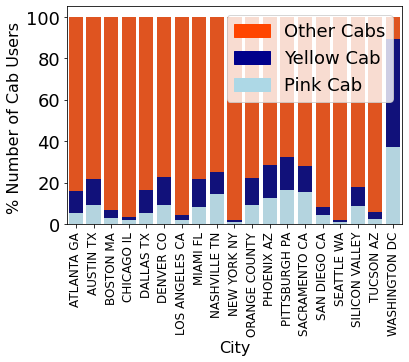

In [26]:
#=== City-Wise Cab users covered by each company as a percentage of the total population of cab users
# This is the number of users covered by Yellow and Pink cab in each city against all cab users present in the city

# Import data ot total cab users per city
city_pop_data = pd.read_csv("/home/arnold/Desktop/Data_Glacier/Week2/Week_2/City.csv")

# Clean up: Information from SANFRANSISC0 is missing in the main data therefore it should be removed
city_pop_data = city_pop_data.loc[city_pop_data["City"] != "SAN_FRANCISCO_CA"].reset_index(drop=True)

# Calculate percentage contribution for each Cab
Pink_Cab['Perc_Users'] = [i / j * 100 for i,j in zip(Pink_Cab['Customer_ID'], city_pop_data['Users'])] #calculate pink cab percentage contribution from the total
Yellow_Cab['Perc_Users'] = [i / j * 100 for i,j in zip(Yellow_Cab['Customer_ID'], city_pop_data['Users'])] #calculate yellow cab percentage contribution from the total

# Calculate total percentage
city_pop_data['Perc_Users'] = [i / j * 100 for i,j in zip(city_pop_data['Users'], city_pop_data['Users'])] #label the sum as 100% to represent the highest total percent

# Plotting the data
#== bar chart 1 -> all cab users per city
bar1 = sns.barplot(x="City",  y="Perc_Users", data=city_pop_data, color='orangered')

#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar2 = sns.barplot(x="City",  y="Perc_Users", data=Yellow_Cab, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar3 = sns.barplot(x="City", y="Perc_Users", data=Pink_Cab, color='lightblue')

bar3.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 
#== add legend
top_bar = mpatches.Patch(color='orangered', label='Other Cabs')
mid_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right')
#== add axes labels
bar2.set_ylabel("% Number of Cab Users ", fontsize = 16)
bar2.set_xlabel("City", fontsize = 16)

#Conclusion
#Pink or Yellow Cabs contribute the largest percentage of cab user in Washington DC 

Text(0.5, 0, 'Year')

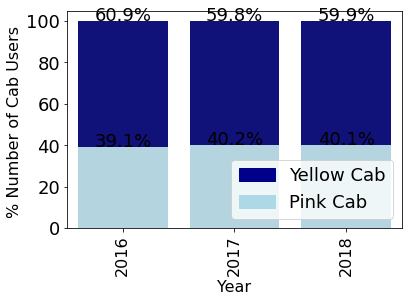

In [27]:
#=== User Covered by Company and Customer base Year wise
#=== Cab users covered by each Company as a percentage considering 
#=== their sum across all 19 Cities (National coverage) per year

# Total National User Coverage by both Cabs per year (100%) 
Cab_Coverage = my_data.groupby([my_data["Date_of_Travel"].dt.year, 'Company'])["Customer_ID"].nunique().reset_index() #Calculate total number of unique Customer_IDs(users)
National_User_Coverage = Cab_Coverage.groupby([Cab_Coverage["Date_of_Travel"]])["Customer_ID"].sum().reset_index() #Calculate total number of unique Customer_IDs(users)

# Pink Cab Coverage
Pink_Cab = Cab_Coverage[Cab_Coverage['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = Cab_Coverage[Cab_Coverage['Company'].str.contains('Yellow Cab')].reset_index(drop=True)

# Calculate percentages of Pink Cab from the total
Pink_Cab['Perc_Users'] = [i / j * 100 for i,j in zip(Pink_Cab['Customer_ID'], National_User_Coverage['Customer_ID'])] #calculate pink cab percentage contribution from the total

# Yellow Cab Percentage will be 100% (for plotting a stacked bar graph)
Yellow_Cab['Perc_Users'] = [i / j * 100 for i,j in zip(National_User_Coverage['Customer_ID'], National_User_Coverage['Customer_ID'])] #Yellow percentage contribution will be 100% to be plotted at the back of stacked bargraph
#The real percentage values will be used for annotation of bar tops in stacked bars
Yellow_Cab['Perc_annotation'] = [i / j * 100 for i,j in zip(Yellow_Cab['Customer_ID'], National_User_Coverage['Customer_ID'])] #calculate pink cab percentage contribution from the total

# Plotting the data
#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="Date_of_Travel",  y="Perc_Users", data=Yellow_Cab, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar2 = sns.barplot(x="Date_of_Travel", y="Perc_Users", data=Pink_Cab, color='lightblue')

bar2.tick_params(axis='x', rotation=90, labelsize = 16)  # Rotate x axis labels 

#== annotate Percentages
percentage = pd.concat([Yellow_Cab["Perc_annotation"], Pink_Cab["Perc_Users"]])
percentage = percentage.to_list()

patches = bar2.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   bar2.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
       
#== Add legend
top_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, bottom_bar], loc='lower right')
#== add axes labels
bar2.set_ylabel("% Number of Cab Users ", fontsize = 16)
bar2.set_xlabel("Year", fontsize = 16)

#Conclusion
#Yellow cab has a wider reach to customers compared to pink Cab

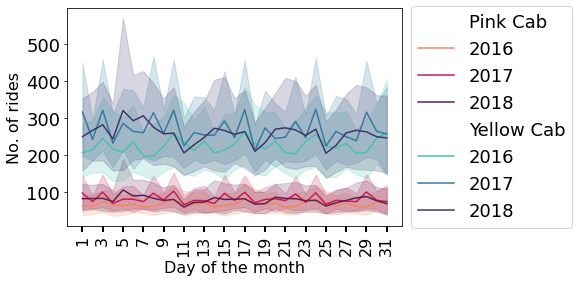

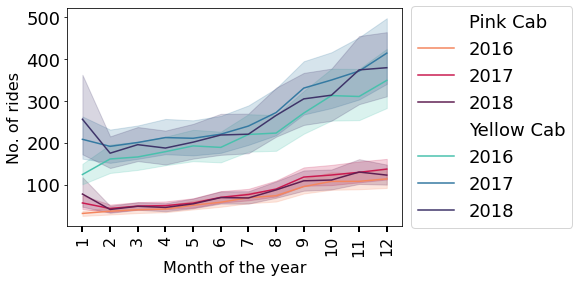

In [28]:
#=== Seasonality in demand

# Days of the month vs the number or rides (the rolling monthly average)
Daily_Users = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company']).size().reset_index(name='count')

Pink_Cab = Daily_Users[Daily_Users['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = Daily_Users[Daily_Users['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

# Plotting
#retrieve the day, month and year values
Pink_Cab['day'] = Pink_Cab["Date_of_Travel"].dt.day
Pink_Cab['month'] = Pink_Cab["Date_of_Travel"].dt.month
Pink_Cab['year'] = Pink_Cab["Date_of_Travel"].dt.year

Yellow_Cab['day'] = Yellow_Cab["Date_of_Travel"].dt.day
Yellow_Cab['month'] = Yellow_Cab["Date_of_Travel"].dt.month
Yellow_Cab['year'] = Yellow_Cab["Date_of_Travel"].dt.year


# Plot Seasonality (based on day of the month)
#Pink
palette = sns.color_palette("rocket_r", 3)  #set colour pallete
ax1 = sns.lineplot(x='day',y='count',hue='year',data=Pink_Cab, palette = palette) #Pink Cab lines
#Yellow (on the same plot)
palette = sns.color_palette("mako_r", 3)  #set different colour palette
ax2 = sns.lineplot(x='day',y='count',hue='year',data=Yellow_Cab, palette = palette) #Yellow cab lines

#set y x labels
ax2.set_ylabel("No. of rides", fontsize = 16)
ax2.set_xlabel("Day of the month", fontsize = 16)
#set x ticks
y_ticks = np.arange(1, 32, 2)
ax2.set_xticks(y_ticks)
ax2.tick_params(axis='x', length=6, width=2, rotation=90, labelsize = 16) 

#add legend
legend = ax2.legend(ncol=1, title = "", bbox_to_anchor=(1, 1.05))
legend.texts[0].set_text("Pink Cab")
legend.texts[4].set_text("Yellow Cab")
#plt.savefig('fig16.png',bbox_inches='tight', format='png', dpi=600)

plt.show()


#Plot Seasonality (based on month of the year)
#Pink
palette = sns.color_palette("rocket_r", 3) 
ax1 = sns.lineplot(x='month',y='count',hue='year',data=Pink_Cab, palette = palette)
#Yellow (on the same plot)
palette = sns.color_palette("mako_r", 3) 
ax2 = sns.lineplot(x='month',y='count',hue='year',data=Yellow_Cab, palette = palette)

#set y labels
ax2.set_ylabel("No. of rides", fontsize = 16)
ax2.set_xlabel("Month of the year", fontsize = 16)
#set x ticks
y_ticks = np.arange(1, 13, 1)
ax2.set_xticks(y_ticks)
ax2.tick_params(axis='x', length=6, width=2, rotation=90, labelsize = 16) 

#add legend
legend = ax2.legend(ncol=1, title = "", bbox_to_anchor=(1, 1.05))
legend.texts[0].set_text("Pink Cab")
legend.texts[4].set_text("Yellow Cab")
#plt.savefig('fig17.png',bbox_inches='tight', format='png', dpi=600)

plt.show()

#CONCLUSION
# Demand is high on the 5th day of the month for both cabs
# Demand increases exponentially towards the end of the year

#Reference
#: https://stackoverflow.com/questions/57601552/how-to-plot-timeseries-using-pandas-with-monthly-groupby

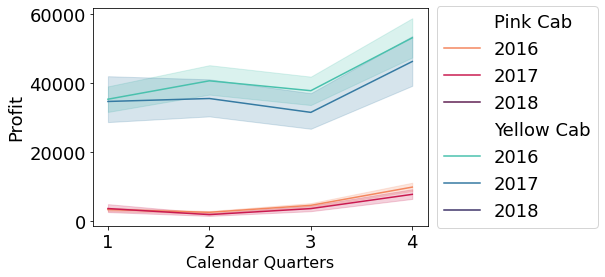

In [29]:
#=== Seasonality in profit levels
# Seasonal pattern for 4 Quarter cycles

Daily_Profit = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company'])['Profit'].sum().reset_index()
Daily_Profit['Quarterly_groups'] = Daily_Profit["Date_of_Travel"].dt.quarter  #data is labeled quarterly(1,2,3 or 4) of each year

Pink_Cab = Daily_Profit[Daily_Profit['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = Daily_Profit[Daily_Profit['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 


# Plotting seasonality (based on Quarterly groups values)
#Pink
palette = sns.color_palette("rocket_r", 3)  #set colour pallete
ax1 = sns.lineplot(x='Quarterly_groups',y='Profit',hue=Daily_Profit["Date_of_Travel"].dt.year,data=Pink_Cab, palette = palette) #Pink Cab lines
#Yellow (on the same plot)
palette = sns.color_palette("mako_r", 3)  #set different colour palette
ax2 = sns.lineplot(x='Quarterly_groups',y='Profit',hue=Daily_Profit["Date_of_Travel"].dt.year,data=Yellow_Cab, palette = palette) #Yellow cab line plots

#set x labels
ax2.set_xlabel("Calendar Quarters", fontsize = 16)

#add legend
legend = ax2.legend(ncol=1, title = "", bbox_to_anchor=(1, 1.05))
legend.texts[0].set_text("Pink Cab")
legend.texts[4].set_text("Yellow Cab")

plt.show()

#CONCLUSION
# Yellow Cab registers increased profits in the second quarter of the year, whearas Pink Cab records reduced profit
# Both companies exhibit increased and largest profit levels in last quarter of the year

Text(0.5, 0, 'Day of the Week')

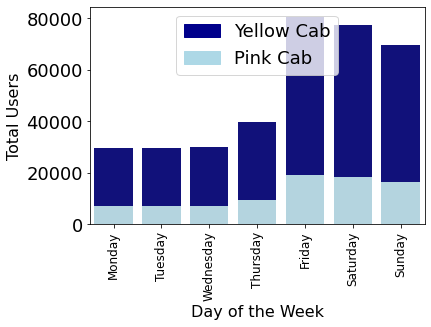

In [30]:
#=== Customer analysis daywise

# Customer numbers (unique) per day of the week
Daily_Users = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company'])["Customer_ID"].nunique().reset_index() #count cab users each day
Daily_Users['DayOfWeek'] = Daily_Users["Date_of_Travel"].dt.day_name() #create a column indicating each day of the week
Daily_Users = Daily_Users.groupby([Daily_Users['DayOfWeek'], 'Company'])["Customer_ID"].sum().reset_index() #group and sum all customer numbers based on day of the week

# Sort the data to have the week begin on Monday
sorter = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter)))) #create dictionary, each day represented by a number in descending order

Daily_Users['Day_id'] = Daily_Users.index #create a column with dataframe indexes as filling values 
Daily_Users['Day_id'] = Daily_Users['DayOfWeek'].map(sorterIndex) #map dayofweek to the values in dictionary and replace Day_id appropriately
Daily_Users.sort_values('Day_id', inplace=True) #Sort new values in Day_id 
Daily_Users.head()

# Plotting stacked bar graph
#Customer numbers represented by each cab
Pink_Cab = Daily_Users[Daily_Users['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = Daily_Users[Daily_Users['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

Yellow_Cab['Customer_ID'] = Yellow_Cab['Customer_ID']+Pink_Cab['Customer_ID'] #Stacking Yellow Cab over Pink Cab 

#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="DayOfWeek",  y="Customer_ID", data=Yellow_Cab, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar2 = sns.barplot(x="DayOfWeek", y="Customer_ID", data=Pink_Cab, color='lightblue')
bar2.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 

#add legend
top_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, bottom_bar], loc='upper center')
#add axes labels
bar2.set_ylabel("Total Users", fontsize = 16)
bar2.set_xlabel("Day of the Week", fontsize = 16)

#Conclusion
#Both cabs record higher number of customers on Friday, Saturday and Sunday 

Text(0.5, 0, 'Day of the Week')

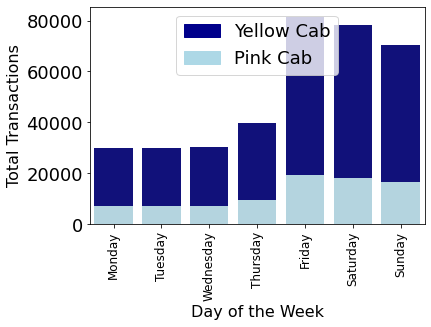

In [31]:
#=== Ride analysis daywise

# Ride numbers (Transaction IDs) per day of the week
Daily_Transactions = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company'])["Transaction_ID"].count().reset_index() #count cab users each day
Daily_Transactions['DayOfWeek'] = Daily_Transactions["Date_of_Travel"].dt.day_name() #create a column indicating each day of the week
Daily_Transactions = Daily_Transactions.groupby([Daily_Transactions['DayOfWeek'], 'Company'])["Transaction_ID"].sum().reset_index() # #group and sum all customer based on day of the week

# Sort the data to have the week begin on Monday
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter)))) #create dictionary, each day represented by a number in descending order

Daily_Transactions['Day_id'] = Daily_Transactions.index #create a column with dataframe indexes as filling values 
Daily_Transactions['Day_id'] = Daily_Transactions['DayOfWeek'].map(sorterIndex) #map dayofweek to the values in dictionary and replace Day_id
Daily_Transactions.sort_values('Day_id', inplace=True) #Sort new values in Day_id 
Daily_Transactions.head()

# Plotting stacked bar graph for ride numbers represented by each cab
Pink_Cab = Daily_Transactions[Daily_Transactions['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = Daily_Transactions[Daily_Transactions['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

Yellow_Cab['Transaction_ID'] = Yellow_Cab['Transaction_ID']+Pink_Cab['Transaction_ID'] #Stacking Yellow Cab over Pink Cab 

#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="DayOfWeek",  y="Transaction_ID", data=Yellow_Cab, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar2 = sns.barplot(x="DayOfWeek", y="Transaction_ID", data=Pink_Cab, color='lightblue')
bar2.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 

#add legend
top_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, bottom_bar], loc='upper center')
#add axes labels
bar2.set_ylabel("Total Transactions", fontsize = 16)
bar2.set_xlabel("Day of the Week", fontsize = 16)

#CONCLUSION
#Both cabs record larger number of transactions on Friday, Saturday and Sunday 

Text(0.5, 0, 'Distance travelled (bins)')

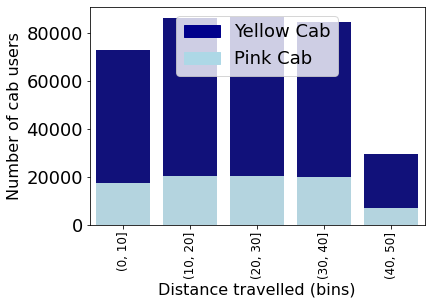

In [32]:
#=== Customer analysis based on ride distance (KM Travelled)

#== Distances will be grouped into short, medium , and long distance (bins)
#== min = 1.8, max = 48 from my_data.describe()

# Bins representing KMs travelled
bins = [0, 10, 20, 30, 40, 50]
#OR 
#bins = np.arange(0, max(my_data['KM_Travelled'])+10, 10)
my_data['Dist_Groups'] = pd.cut(my_data['KM_Travelled'], bins)

# Count total Customers accumulated for each Distance_group per company
Users_by_Dist = my_data.groupby([my_data["Dist_Groups"], 'Company'])["Transaction_ID"].count().reset_index()

#Plotting stacked bar graph
#Customer numbers represented by each cab
Pink_Cab = Users_by_Dist[Users_by_Dist['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = Users_by_Dist[Users_by_Dist['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

Yellow_Cab['Transaction_ID'] = Yellow_Cab['Transaction_ID']+Pink_Cab['Transaction_ID'] #Stacking Yellow Cab over Pink Cab 

#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="Dist_Groups",  y="Transaction_ID", data=Yellow_Cab, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar2 = sns.barplot(x="Dist_Groups", y="Transaction_ID", data=Pink_Cab, color='lightblue')
bar2.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 

#== add legend
top_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, bottom_bar], loc='upper center')
#== add axes labels
bar2.set_ylabel("Number of cab users", fontsize = 16)
bar2.set_xlabel("Distance travelled (bins)", fontsize = 16)

#CONCLUSION
# Both Yellow and Pink Cabs exhibit nearly uniform number of customers plying short and medium distance (<40KM)
# In both Cabs, a smaller number of customers travel long distances (> 40KM)
# Yellow Cab has a good customer reach across all distances

Text(0.5, 0, 'Holidays')

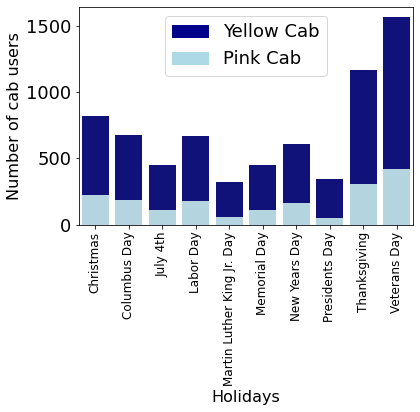

In [33]:
#=== Customer cab preferences on holidays

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Extract holiday dates and names from my_data
cal = calendar()
holidays = cal.holidays(start=my_data["Date_of_Travel"].min(), end=my_data["Date_of_Travel"].max(), return_name=True) #extracts holiday dates
holidays = holidays.reset_index(name='holiday').rename(columns={'index':'date'}) #Assign header names to columns

# Extract each holidays' associated data
my_data['Holiday'] = my_data["Date_of_Travel"].isin(holidays['date']).astype(str) #Assigns a row with false or true to indicate holiday, convert True/False to a string
holidays_data = my_data[my_data['Holiday'].str.contains('True')].reset_index(drop=True) #Extract True statements with associated data

# Group the data based on holiday dates & company and count number of users on each date
holidays_users = holidays_data.groupby([holidays_data["Date_of_Travel"].dt.floor('d'), 'Company'])["Transaction_ID"].count().reset_index(name='count')

# Numbers represented by each cab
Pink_Cab = holidays_users[holidays_users['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = holidays_users[holidays_users['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

# Add column to identify each holiday by name
Yellow_Cab['Holiday'] = np.where((Yellow_Cab['Date_of_Travel'] == holidays['date']), holidays['holiday'], np.nan)
Pink_Cab['Holiday'] = np.where((Pink_Cab['Date_of_Travel'] == holidays['date']), holidays['holiday'], np.nan)

# Sum all user numbers per holiday name per cab, disregarding year of travel (group by holiday name& company)
Pink_Cab = Pink_Cab.groupby([Pink_Cab["Holiday"], 'Company'])["count"].sum().reset_index()
Yellow_Cab = Yellow_Cab.groupby([Yellow_Cab["Holiday"], 'Company'])["count"].sum().reset_index()

# Plottting stacked barplots
Yellow_Cab['count'] = Yellow_Cab['count']+Pink_Cab['count'] #Stacking Yellow Cab over Pink Cab 

#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="Holiday",  y="count", data=Yellow_Cab, color='darkblue')

#== bar chart 2 -> bottom bars (group of Company=='Pink Cab')
bar2 = sns.barplot(x="Holiday", y="count", data=Pink_Cab, color='lightblue')
bar2.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 

#== add legend
top_bar = mpatches.Patch(color='darkblue', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='lightblue', label='Pink Cab')
bar2.legend(handles=[top_bar, bottom_bar], loc='upper center')
#== add axes labels
bar2.set_ylabel("Number of cab users", fontsize = 16)
bar2.set_xlabel("Holidays", fontsize = 16)

#CONCLUSION
#Yellow Cab attracts more customers on holidays the Pink Cab
#Thanksgiving and Veterans holidays record the largest number of cab users compared to other holidays

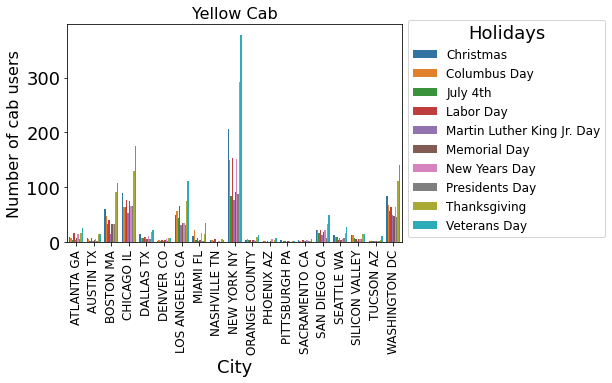

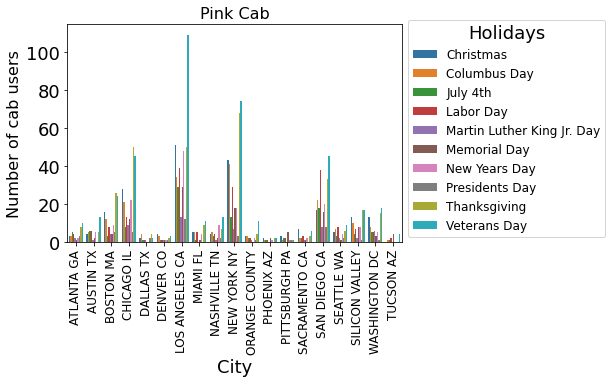

In [34]:
#=== Customer preferences on holidays per city

# Extract holiday dates and names from my_data
cal = calendar()
holidays = cal.holidays(start=my_data["Date_of_Travel"].min(), end=my_data["Date_of_Travel"].max(), return_name=True) #extracts holiday dates
holidays = holidays.reset_index(name='holiday').rename(columns={'index':'date'}) #Assign header names for columns

#Extract each holidays' associated data
my_data['Holiday'] = my_data["Date_of_Travel"].isin(holidays['date']).astype(str) #Assigns a row with false or true to indicate holiday, convert True/False to a string
holidays_data = my_data[my_data['Holiday'].str.contains('True')].reset_index(drop=True) #Extract True statements with associated data
#======== the above code is similar to the previous cell ===========

#group the data based on holiday dates, company & City, and count number of users on each date
citywise_holiday_users = holidays_data.groupby([holidays_data["Date_of_Travel"].dt.floor('d'), 'Company', 'City'])["Transaction_ID"].count().reset_index(name='count')

#Add column to identify each holiday by name
holiday_names = []
for x in citywise_holiday_users['Date_of_Travel']:
    gen = holidays.loc[holidays['date'] == x] #extract row containing date and holiday name
    holiday_names.append(gen['holiday'].to_string(index=False)) #append only holiday name to a list

citywise_holiday_users['Holiday'] = holiday_names

#Numbers represented by each cab
Pink_Cab = citywise_holiday_users[citywise_holiday_users['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = citywise_holiday_users[citywise_holiday_users['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

#Group and sum all user numbers by holiday name, company, city, disregarding year of travel
Pink_Cab = Pink_Cab.groupby([Pink_Cab["Holiday"], 'Company', 'City'])["count"].sum().reset_index()
Yellow_Cab = Yellow_Cab.groupby([Yellow_Cab["Holiday"], 'Company', 'City'])["count"].sum().reset_index()

#=== Plotting
#Yellow Cab
#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="City",  y="count", data=Yellow_Cab, hue = 'Holiday')#color='darkblue')

#== add axes labels
bar1.set_ylabel("Number of cab users", fontsize = 16)
bar1.set_title("Yellow Cab", fontsize = 16)

#add legend
legend = bar1.legend(ncol=1, title = "Holidays", bbox_to_anchor=(1, 1.05), fontsize = 12)
bar1.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 
plt.show()


#=== Pink Cab
#== bar chart 1 -> top bars (group of 'Company==Yellow Cab')
bar1 = sns.barplot(x="City",  y="count", data=Pink_Cab, hue = 'Holiday')#color='darkblue')

#== add axes labels
bar1.set_ylabel("Number of cab users", fontsize = 16)
bar1.set_title("Pink Cab", fontsize = 16)

#add legend
legend = bar1.legend(ncol=1, title = "Holidays", bbox_to_anchor=(1, 1.05), fontsize = 12)
bar1.tick_params(axis='x', rotation=90, labelsize = 12)  # Rotate x axis labels 

#CONCLUSION
#Yellow Cab attends to more customers on holidays in New York, Boston, Chicago, Los Angeles, and Washington 
#Pink Cab attends a larger number of custormers on holidays in Chicago, Los Angeles, New York, and San Diego 

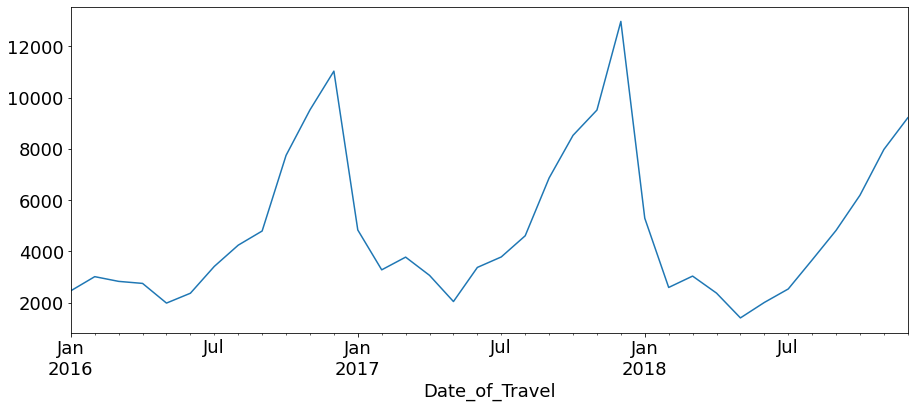

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:706.5676125353738
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:432.89182990102137
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:399.69837121039467
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:178.16540217332374
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:418.3840711859076
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:374.43913916764825
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:208.68642332940948
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:171.66595133886867
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:678.6386420805325
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:434.52809949889036
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:371.7296567471774
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:160.6958879698628
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:404.14395832867
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:362.0163936089805
ARIMA(0, 0, 1)x(1, 1, 0, 12)

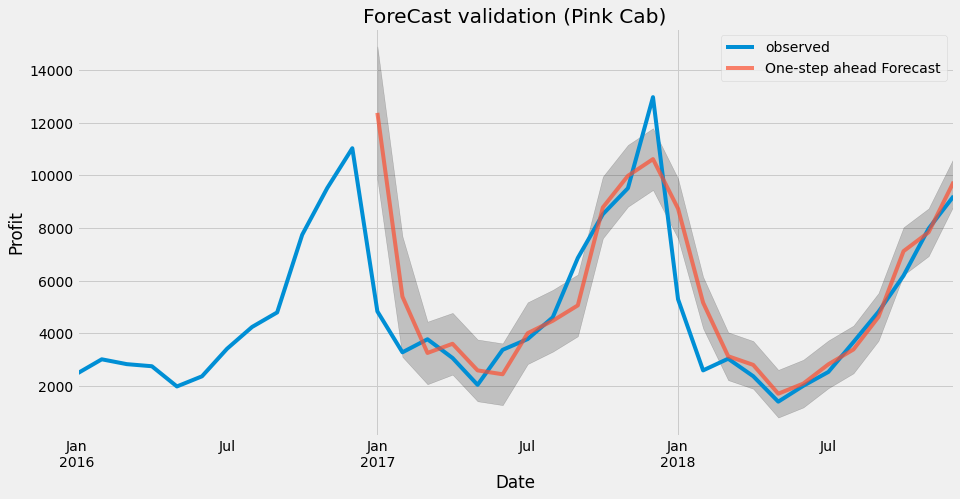

The Mean Squared Error of our forecasts is 3844435.02
The Root Mean Squared Error of our forecasts is 1960.72


46.55608705431678

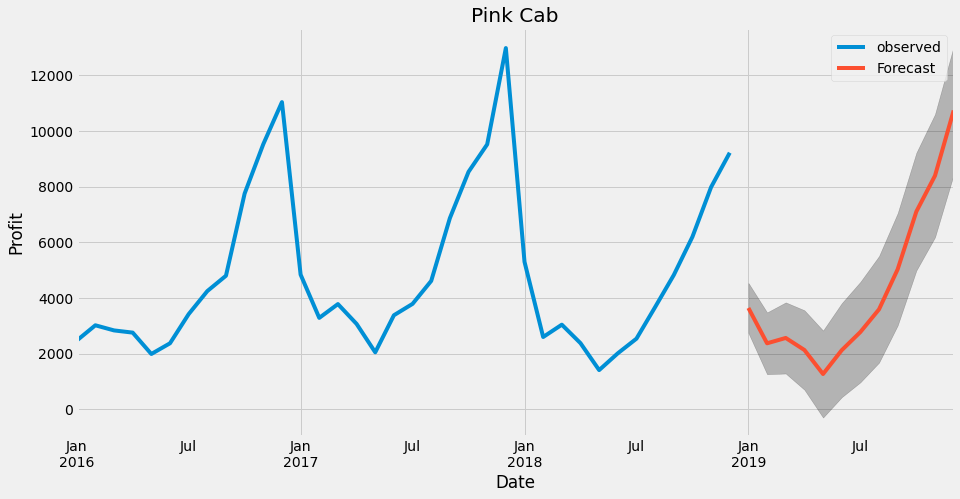

In [35]:
#=== Profit forecasting for 2019 (Pink Cab)

#group and sum all profit based on day of travel & company
profit_data = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company'])["Profit"].sum().reset_index() 

#Numbers represented by each cab
Pink_Cab = profit_data[profit_data['Company'].str.contains('Pink Cab')].reset_index(drop=True)
#Yellow_Cab = profit_data[profit_data['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

#=== Pink_Cab  ====
# Set date of travel as index for timeseries data
Pink_Cab = Pink_Cab.set_index("Date_of_Travel")

# Downsample: Decrease freq of samples from days to months by calculating average daily sales for each month, and use the start of each month as a timestamp
y = Pink_Cab['Profit'].resample('MS').mean()  #MS = month start frequency
y.plot(figsize=(15, 6)) 
plt.show()

#We assume the timeseries is not stationary (It has significant dependence among values), therefore
#we use ARIMA statistical model to forecast profit

#Finding optimal set of parameters for best performance of our model
#Initialising ARIMA parameters (p,d,q) that account for seasonality, trend, and noise in data
import itertools
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

#Parameter selection: 
#using a “grid search” to find the optimal set of parameters that yields the best performance for our model.
def pdq_parameters(pdq):
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue

pdq_parameters(pdq)

#The above printout indicates that ARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 142.76. 
#Thus we consider this to be optimal option.

# Model fitting
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#results.plot_diagnostics(figsize=(16, 8)) #Model diagnosis

# VALIDATE forecast
# compare predicted profit to real profit of the time series, 
# We set forecasts to start at 2017–01–01 to the end of the data
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title('ForeCast validation (Pink Cab)')
plt.legend()
plt.show()
#Generally the forecast overlaps with the true values

# (root) mean square error values
#MSE
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# Producing forecast values and plots
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title('Pink Cab')
plt.legend()

#==== CONCLUSION
y2019_forecasted = pred_uc.predicted_mean  #forecast values
y_2018_truth = y['2018-01-01':]            #true values
comparison = y2019_forecasted.mean() - y_2018_truth.mean() #compare average yearly profit
comparison     
#The output value is +46.56
#Therefore Pink Cab profit is likely to increase in the year 2019

# Reference
## https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

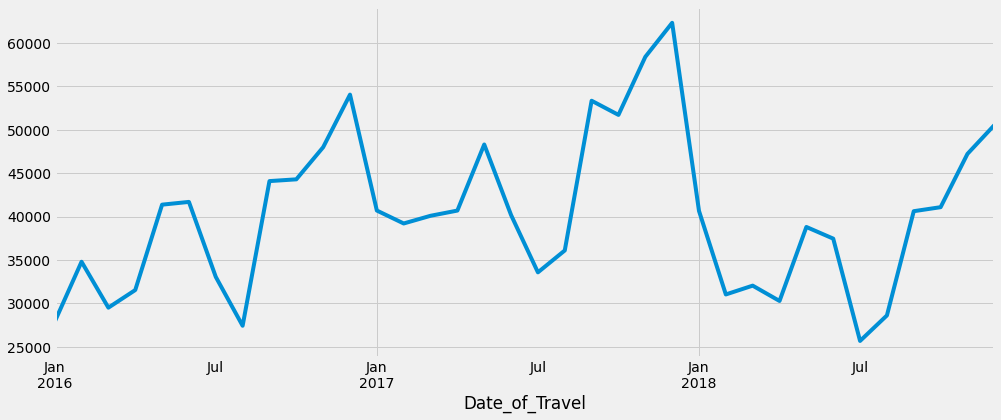

Examples of parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:845.6463736699636
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:526.2769404163846
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:483.4620322034333
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:223.66632899304986
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:506.86152372086906
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:469.8204924184469
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:242.31503567210106
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:225.64192371468062
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:799.555850310102
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:516.0614992403443
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:448.48984096272363
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:202.97192349011846
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:560.8304456704186
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:516.294654987252
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:248.70483830005847
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:181.6334706766839
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:710.9670351388083
ARI

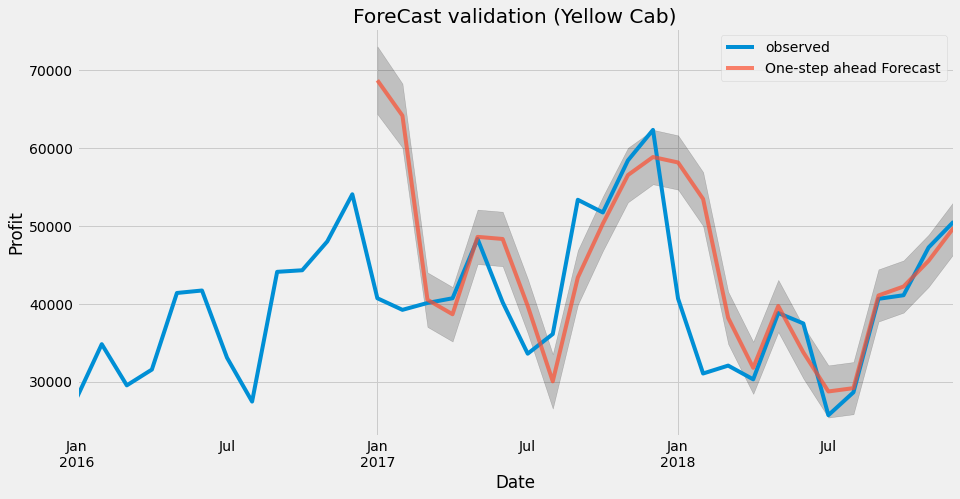

The Mean Squared Error of our forecasts is 106181030.77
The Root Mean Squared Error of our forecasts is 10304.42


866.2049760735827

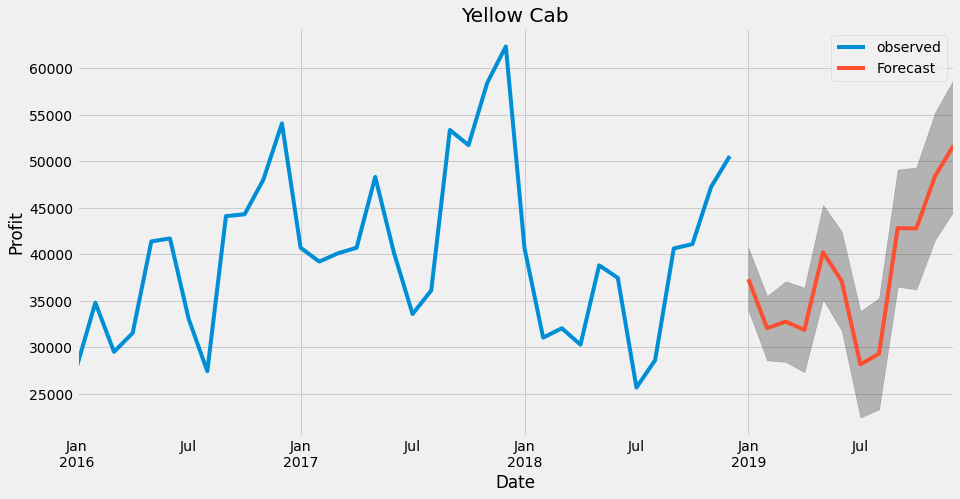

In [36]:
#=== Profit forecasting for 2019 (Yellow Cab)

profit_data = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company'])["Profit"].sum().reset_index() # #group and sum all profit based on day of travel

# Numbers represented by each cab
#Pink_Cab = profit_data[profit_data['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = profit_data[profit_data['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

#=== Yellow_Cab  ====
#===The code below is repeated from Pink_Cab analysis cell above
#Set date of travel as index for timeseries data
Yellow_Cab = Yellow_Cab.set_index("Date_of_Travel")

#Downsample: Decrease freq of samples from days to months by calculating average daily sales for each month, and use the start of each month as a timestamp
y = Yellow_Cab['Profit'].resample('MS').mean()  #MS = month start frequency
y.plot(figsize=(15, 6)) 
plt.show()

#We assume the timeseries is not stationary (It has significant dependence among values), therefore
#we use ARIMA statistical model to forecast profit

# Finding optimal set of parameters for best performance of our model
# Initialising ARIMA parameters (p,d,q) that account for seasonality, trend, and noise in data
import itertools
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')

# Parameter selection: 
# using a “grid search” to find the optimal set of parameters that yields the best performance for our model.
pdq_parameters(pdq)          #This function is from the previous cell
            
#The above output indicate that SARIMAX(1, 1, 1)x(0, 1, 1, 12) - AIC:169.27 yields the lowest AIC value of 142.76. 
#Thus we consider this to be optimal option.

# Model fitting
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#results.plot_diagnostics(figsize=(16, 8)) #Model diagnosis

# VALIDATE forecast
# compare predicted profit to real profit of the time series, 
# We set forecasts to start at 2017–01–01 to the end of the data
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title('ForeCast validation (Yellow Cab)')
plt.legend()
plt.show()
#Generally the forecast overlaps with the true values

# (root) mean square error values
#MSE
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# Producing forecast values and plots
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title('Yellow Cab')
plt.legend()

#=== CONCLUSION
y2019_forecasted = pred_uc.predicted_mean
y_2018_truth = y['2018-01-01':]
comparison = y2019_forecasted.mean() - y_2018_truth.mean() #compare average yearly profit
comparison     
#The output value is +866.20
#Therefore Yellow Cab profit is also likely to increase in the year 2019, although with a larger margin
#relative to Pink Cab

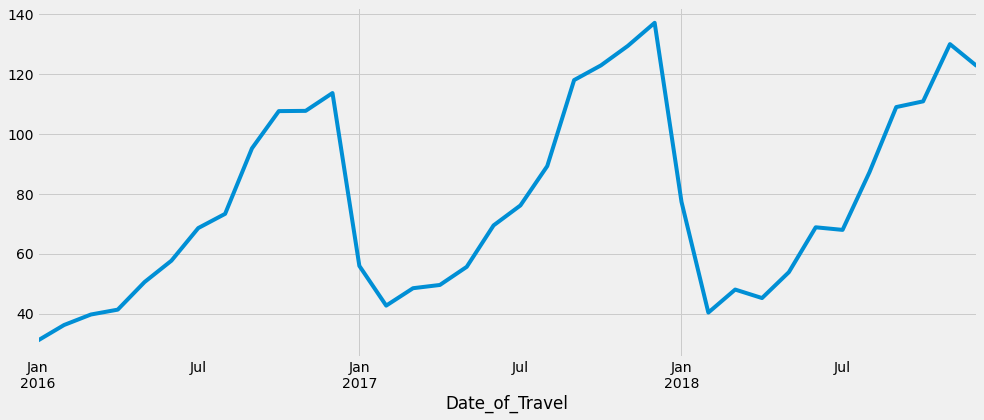

Examples of parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:411.82294548214367
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:263.4333873240324
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:182.30978699475423
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:67.89451881026261
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:192.3110531387371
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:174.6703549770295
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:90.50957492766652
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:69.89561261629508
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:362.74709778835035
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:228.26174766467022
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:166.25614541603258
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:61.7902911816432
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:185.3678753937686
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:165.41852608339835
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:90.67129475996317
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:62.99738849415819
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:299.1753429483265
ARI

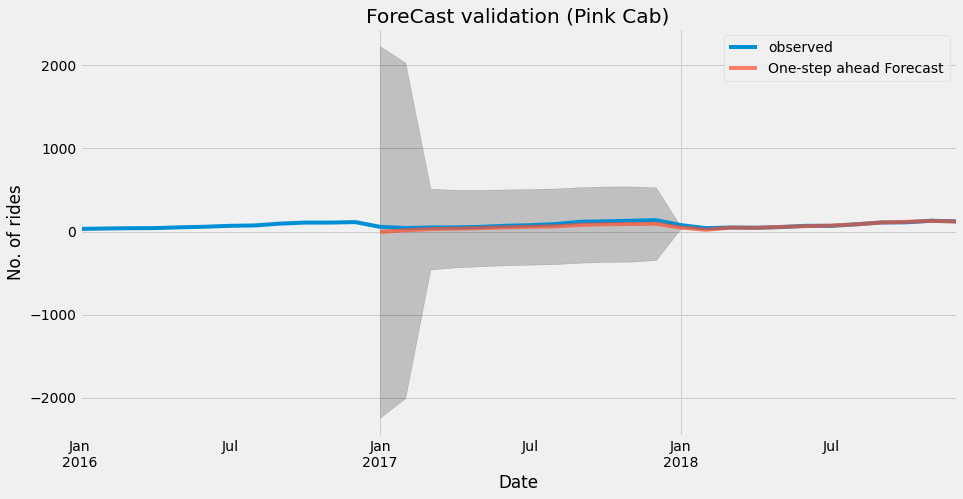

The Mean Squared Error of our forecasts is 590.5
The Root Mean Squared Error of our forecasts is 24.3


2.0045054104982825

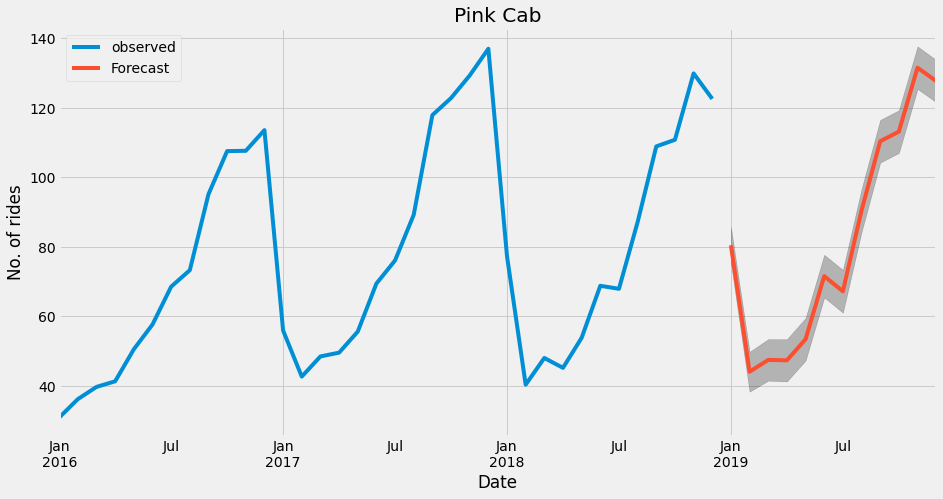

In [37]:
#=== Number of rides forecasting for 2019 (Pink Cab)

rides_data = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company'])['Customer_ID'].agg(['count']).reset_index() # group and sum all profit based on day of travel

#Numbers represented by each cab
Pink_Cab = rides_data[rides_data['Company'].str.contains('Pink Cab')].reset_index(drop=True)
#Yellow_Cab = profit_data[profit_data['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

#=== Pink_Cab 
# Set date of travel as index for timeseries data
Pink_Cab = Pink_Cab.set_index("Date_of_Travel")

# Downsample: Decrease freq of samples from days to months by calculating average daily sales for each month, and use the start of each month as a timestamp
y = Pink_Cab['count'].resample('MS').mean()  #MS = month start frequency
y.plot(figsize=(15, 6)) 
plt.show()

#We assume the timeseries is not stationary (It has significant dependence among values), therefore
#we use ARIMA statistical model to forecast profit

# Finding optimal set of parameters for best performance of our model
# Initialising ARIMA parameters (p,d,q) that account for seasonality, trend, and noise in data
import itertools
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')

# Parameter selection: 
#using a “grid search” to find the optimal set of parameters that yields the best performance for our model.
pdq_parameters(pdq)          
            
#The above output indicate that SARIMAX(1, 0, 1)x(1, 1, 1, 12)- AIC:58.78 yields the lowest AIC value of 142.76. 
#Thus we consider this to be optimal option.

# Model fitting
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#results.plot_diagnostics(figsize=(16, 8)) #Model diagnosis

# VALIDATE forecast
# compare predicted profit to real profit of the time series, 
# We set forecasts to start at 2017–01–01 to the end of the data
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No. of rides')
ax.set_title('ForeCast validation (Pink Cab)')
plt.legend()
plt.show()
#Generally the forecast overlaps with the true values

# (root) mean square error values
#MSE
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# Producing forecast values and plots
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('No. of rides')
ax.set_title('Pink Cab')
plt.legend()

#==== CONCLUSION
y2019_forecasted = pred_uc.predicted_mean
y_2018_truth = y['2018-01-01':]
comparison = y2019_forecasted.mean() - y_2018_truth.mean() #compare average yearly profit
comparison     
#The output value is +2.00
#Therefore Pink Cab rides are likely to increase in the year 2019

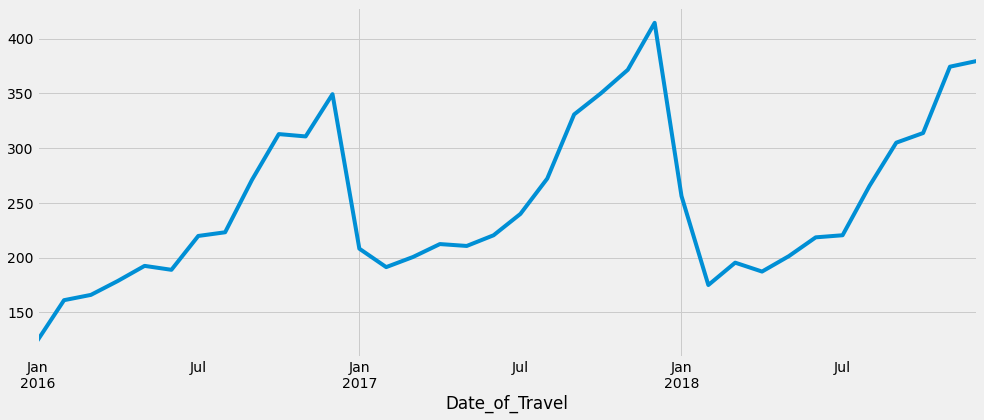

Examples of parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:491.51141797898373
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:315.0168037338561
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:230.03877774524665
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:91.86364227848722
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:243.6278292773746
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:222.48513215312425
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:113.64078911984264
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:93.87667028317622
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:441.1827509337993
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:277.90475131935375
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:211.87394549868205
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:82.36577371236753
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:236.75282660386424
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:215.7628466979694
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:114.44355612063654
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:84.95417943011732
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:360.1830261628005


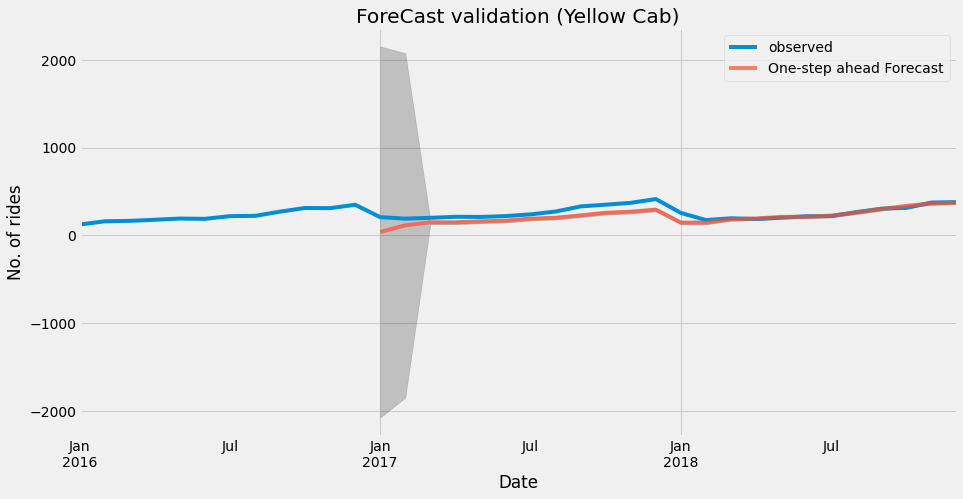

The Mean Squared Error of our forecasts is 4621.96
The Root Mean Squared Error of our forecasts is 67.98


-0.5763099864313403

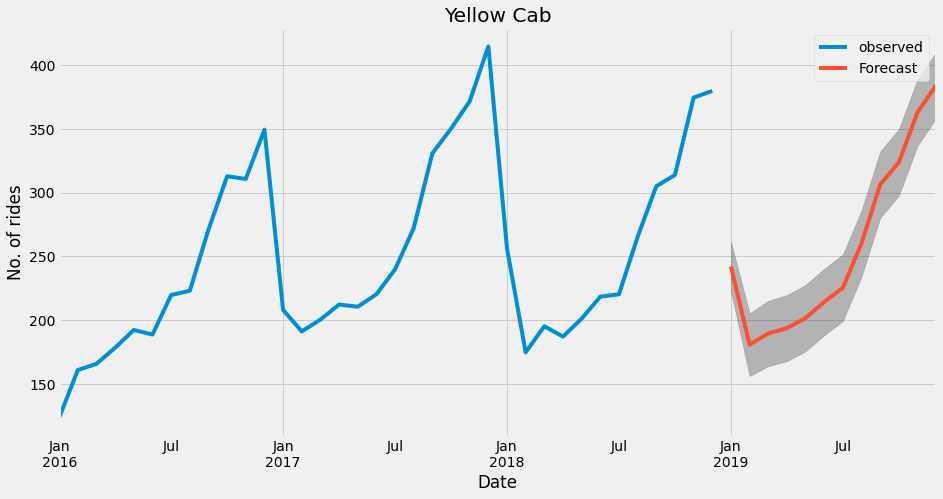

In [38]:
#=== Number of rides forecasting for 2019 (Yellow Cab)

# group and sum all profit based on day of travel
rides_data = my_data.groupby([my_data["Date_of_Travel"].dt.floor('d'), 'Company'])['Customer_ID'].agg(['count']).reset_index()

# Numbers represented by each cab
Pink_Cab = rides_data[rides_data['Company'].str.contains('Pink Cab')].reset_index(drop=True)
Yellow_Cab = rides_data[rides_data['Company'].str.contains('Yellow Cab')].reset_index(drop=True) 

#=== Pink_Cab  ====
#Set date of travel as index for timeseries data
Yellow_Cab = Yellow_Cab.set_index("Date_of_Travel")

# Downsample: Decrease freq of samples from days to months by calculating average daily sales for each month, and use the start of each month as a timestamp
y = Yellow_Cab['count'].resample('MS').mean()  #MS = month start frequency
y.plot(figsize=(15, 6)) 
plt.show()

#We assume the timeseries is not stationary (It has significant dependence among values), therefore
#we use ARIMA statistical model to forecast profit

# Finding optimal set of parameters for best performance of our model
# Initialising ARIMA parameters (p,d,q) that account for seasonality, trend, and noise in data
import itertools
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')

# Parameter selection: 
# using a “grid search” to find the optimal set of parameters that yields the best performance for our model.
pdq_parameters(pdq)          #This function is from previous cell
            
#The above output indicate that SARIMAX(1, 0, 1)x(0, 1, 1, 12) yields the lowest AIC value of 82.35. 
#Thus we consider this to be optimal option.

# Model fitting
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#results.plot_diagnostics(figsize=(16, 8)) #Model diagnosis

# VALIDATE forecast
# compare predicted profit to real profit of the time series, 
# We set forecasts to start at 2017–01–01 to the end of the data
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No. of rides')
ax.set_title('ForeCast validation (Yellow Cab)')
plt.legend()
plt.show()
#Generally the forecast overlaps with the true values

# (root) mean square error values
#MSE
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# Producing forecast values and plots
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('No. of rides')
ax.set_title('Yellow Cab')
plt.legend()
#plt.savefig('fig29.png',bbox_inches='tight', format='png', dpi=600)

#=== CONCLUSION
y2019_forecasted = pred_uc.predicted_mean
y_2018_truth = y['2018-01-01':]
comparison = y2019_forecasted.mean() - y_2018_truth.mean() #compare average yearly profit
comparison     
#The output value is -0.57
#Therefore Yellow Cab rides are likely to decrease in the year 2019

In [39]:
#=== EDA RECOMMENDATION

#Based on the above analysis, Yellow cab is recommended for investment

#===